In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

In [ ]:
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from tqdm import tqdm
img_data=[]

In [ ]:

from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

In [ ]:
img=cv2.imread('/content/einstein_original.jpg', 1)   #Change 1 to 0 for Grey scale images

img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

In [ ]:

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('/content/monalisa_original.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 258ms/step - loss: 0.0031 - accuracy: 0.7495
Epoch 2502/5000
1/1 [==============================] - 0s 274ms/step - loss: 0.0031 - accuracy: 0.7465
Epoch 2503/5000
1/1 [==============================] - 0s 261ms/step - loss: 0.0030 - accuracy: 0.7539
Epoch 2504/5000
1/1 [==============================] - 0s 262ms/step - loss: 0.0030 - accuracy: 0.7545
Epoch 2505/5000
1/1 [==============================] - 0s 265ms/step - loss: 0.0030 - accuracy: 0.7519
Epoch 2506/5000
1/1 [==============================] - 0s 259ms/step - loss: 0.0031 - accuracy: 0.7514
Epoch 2507/5000
1/1 [==============================] - 0s 251ms/step - loss: 0.0030 - accuracy: 0.7532
Epoch 2508/5000
1/1 [==============================] - 0s 274ms/step - loss: 0.0030 - accuracy: 0.7562
Epoch 2509/5000
1/1 [==============================] - 0s 260ms/step - loss: 0.0030 - accuracy: 0.7546
Epoch 2510/5000
1/1 [=================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


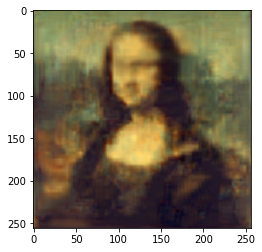

In [14]:

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

model.fit(img_array, img_array2,
        epochs=1000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch


print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


#img2 = Image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg")